<a href="https://colab.research.google.com/github/kivvgsr/-LGMVIP--DataScience/blob/main/ecommers_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = "/content/drive/MyDrive/ecommerceDataset.csv"
df = pd.read_csv(file_path)

df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
5,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
6,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
7,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...
8,Household,Paintings Villa UV Textured Modern Art Print F...
9,Household,Painting Mantra Art Street - Jardin Bird Frame...


#there is no column names so we will add them

In [26]:
column_names = ['label','Text']

# Assign the column names to the DataFrame
df.columns = column_names

# Save it back to CSV (if needed)
df.to_csv('data_with_headers.csv', index=False)
print(df)

             label                                               Text
0        Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
1        Household  SAF 'UV Textured Modern Art Print Framed' Pain...
2        Household  SAF Flower Print Framed Painting (Synthetic, 1...
3        Household  Incredible Gifts India Wooden Happy Birthday U...
4        Household  Pitaara Box Romantic Venice Canvas Painting 6m...
...            ...                                                ...
50419  Electronics  Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420  Electronics  CrossBeats Wave Waterproof Bluetooth Wireless ...
50421  Electronics  Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422  Electronics  Samsung Guru FM Plus (SM-B110E/D, Black) Colou...
50423  Electronics                   Micromax Canvas Win W121 (White)

[50424 rows x 2 columns]


#check if there are any null values and delete them.

In [27]:
# Check for NaN values in each column
nan_count = df.isna().sum()
print(nan_count)


label    0
Text     1
dtype: int64


In [28]:
df1 = df.dropna()

In [29]:
print(df1.isna().sum())

label    0
Text     0
dtype: int64


#checking whether the datase is balanced or not

In [30]:
df1['label'].value_counts()

,count
label,
Household,19312
Books,11820
Electronics,10621
Clothing & Accessories,8670


In [32]:
df1['label'].value_counts()

,count
label,
Household,19312
Books,11820
Electronics,10621
Clothing & Accessories,8670


#we are balancing the data

In [33]:
min_sample= 8670
df_household = df1[df1.label == 'Household'].sample(min_sample,random_state=2022)
df_books = df1[df1.label == 'Books'].sample(min_sample,random_state=2022)
df_electronics = df1[df1.label == 'Electronics'].sample(min_sample,random_state=2022)
df_clothing_accessories = df1[df1.label == 'Clothing & Accessories'].sample(min_sample,random_state=2022)
#

In [34]:
df_balanced = pd.concat([df_household,df_books,df_electronics,df_clothing_accessories],axis=0)
df_balanced.label.value_counts()

,count
label,
Household,8670
Books,8670
Electronics,8670
Clothing & Accessories,8670


#mapping the labels with numbers

In [35]:
df_balanced['label_num'] = df_balanced['label'].map(
    {
        'Household' : 0,
        'Books' : 1,
        'Electronics' : 2,
        'Clothing & Accessories' : 3
    }
)

In [36]:
df_balanced.head(5)

,label,Text,label_num
14608,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...,0
16167,Household,"Lloyd 1.5 Ton 3 Star Window AC (LW19A3N, White...",0
5586,Household,Amazon Brand - Solimo 100% Cotton 6 Piece Towe...,0
10560,Household,KCL Stainless Steel Collander 12 Inches / Vege...,0
18349,Household,looms & weaves Cotton Blend Bath Towels (White...,0


#preprocessing of the text


In [38]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [39]:
df_balanced['preprocess_text']= df_balanced['Text'].apply(preprocess)

#train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocess_text,
    df_balanced.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.label_num
)

#model building


In [41]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (27744,)
Shape of X_test:  (6936,)


In [42]:
X_train.isna().sum()

np.int64(0)

#multinomial classification model

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
clf =Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('mn',MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1734
           1       0.98      0.93      0.95      1734
           2       0.95      0.94      0.94      1734
           3       0.97      0.99      0.98      1734

    accuracy                           0.95      6936
   macro avg       0.95      0.95      0.95      6936
weighted avg       0.95      0.95      0.95      6936



#knn model

In [45]:
from sklearn.neighbors import KNeighborsClassifier
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1734
           1       0.95      0.96      0.96      1734
           2       0.97      0.93      0.95      1734
           3       0.98      0.98      0.98      1734

    accuracy                           0.96      6936
   macro avg       0.96      0.96      0.96      6936
weighted avg       0.96      0.96      0.96      6936



#random forest model

In [46]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1734
           1       0.98      0.97      0.97      1734
           2       0.97      0.95      0.96      1734
           3       0.97      0.99      0.98      1734

    accuracy                           0.96      6936
   macro avg       0.96      0.96      0.96      6936
weighted avg       0.96      0.96      0.96      6936



In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1643,   21,   42,   28],
       [  21, 1687,   11,   15],
       [  66,   13, 1648,    7],
       [   9,    7,    5, 1713]])

Text(95.72222222222221, 0.5, 'Truth')

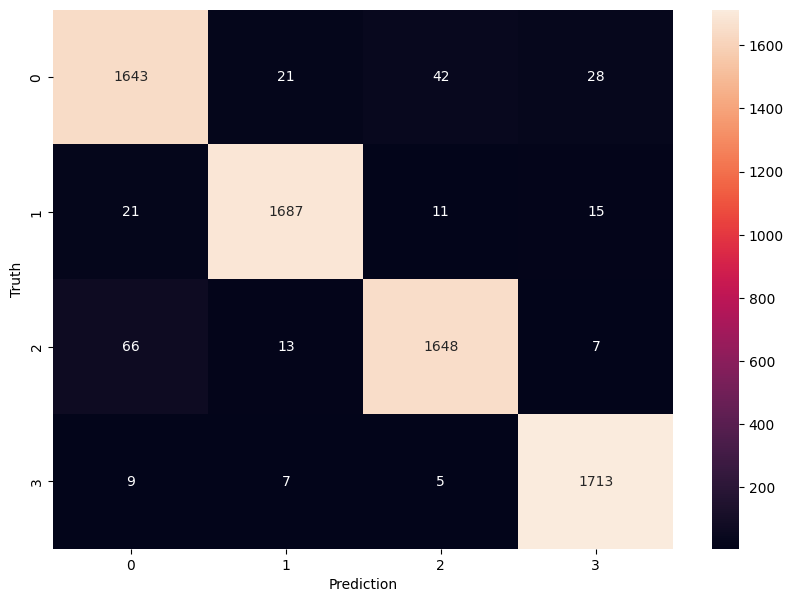

In [49]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')